In [2]:
from bmcs_shell.api import *
import numpy as np

# Evaluating a scanned 3D demonstrator element

## Geometry of the target element

In [3]:
wb_shell = WBTessellation4PEx(
                         a=1000/4,
                         b = 1615/4, 
                         c = 645/4, 
                         e_x = 286/4,
                         gamma=0.683, # a value of gamma = 0.75 was estimated from normals, but a CAD comparison showed that 0.75 doesn't lead to closer geometry to the scanned 
                         n_phi_plus=5, 
                         n_x_plus=3, 
                         wireframe_width=5,
                        ##---- Trimming function works only in WBTessellation4P ----##
                         trim_half_cells_along_y=True,
                         trim_half_cells_along_x=True,
#                          align_outer_nodes_along_x=True,
)
wb_shell.interact()

C:\Users\hspartali\Anaconda3\envs\bmcs_env\lib\site-packages\traittypes\traittypes.py:97: UserWarning: Given trait value dtype "uint32" does not match required type "float32". A coerced copy has been created.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

## Extracting surfaces normals

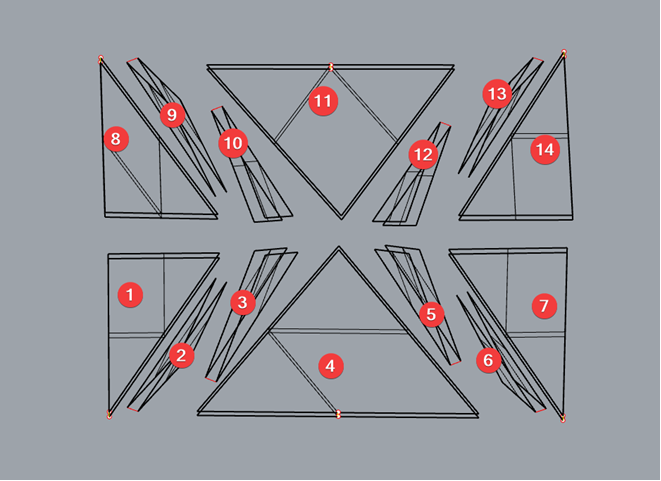

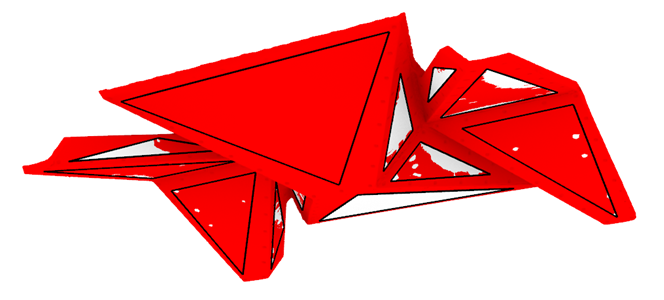

In [41]:
extracted_normal_lines_from_rhino= np.array([[(19.2598,-1110.06,3.66752),
      (19.4497,-1119.79,32.0426)],

      [(78.2531,-1108.3,13.7863),
      (56.5015,-1100.46,32.9034)],

      [(237.98,-1048.35,121.023),
      (216.055,-1039.68,102.473)],

      [(486.547,-1118.97,111.346),
      (486.657,-1110.72,140.189)],

      [(737.623,-1005.79,97.535),
      (716.34,-1014.06,116.993)],

      [(890.645,-1110.04,16.0945),
      (911.87,-1102.94,36.0722)],

      [(946.248,-1117.42,-0.440456),
      (946.166,-1127.18,27.9273)],

      [(1.50688,-395.88,9.32416),
      (1.67641,-386.418,37.7925)],

      [(77.6118,-387.01,14.3671),
      (55.1252,-395.583,32.2795)],

      [(228.155,-494.062,105.649),
      (250.139,-485.528,124.193)],

      [(471.408,-401.123,109.321),
      (471.83,-409.649,138.08)],

      [(717.082,-525.913,92.2506),
      (695.804,-517.909,111.825)],

      [(885.475,-386.334,20.9253),
      (906.659,-393.371,40.9685)],

      [(948.319,-384.048,3.5526),
      (948.095,-374.455,31.9765)]])

In [49]:
rhino_vectors = extracted_normal_lines_from_rhino[:, 1] - extracted_normal_lines_from_rhino[:, 0]
normals = np.zeros_like(rhino_vectors)
for i, v in enumerate(rhino_vectors):
    normals[i] = v / np.linalg.norm(v)
normals

array([[ 0.00633051, -0.32435962,  0.94591266],
       [-0.72502868,  0.26132445,  0.637215  ],
       [-0.73084266,  0.28900369, -0.61834123],
       [ 0.00366668,  0.27500103,  0.96143694],
       [-0.70944407, -0.27567084,  0.64860982],
       [ 0.70749248,  0.23666415,  0.66591626],
       [-0.00273334, -0.32533444,  0.94559507],
       [ 0.00565099,  0.3153992 ,  0.94894226],
       [-0.74955434, -0.28576705,  0.5970808 ],
       [ 0.73279782,  0.28446582,  0.6181315 ],
       [ 0.01406705, -0.28420776,  0.95865952],
       [-0.70927674,  0.26680379,  0.65248927],
       [ 0.70612898, -0.23456522,  0.66810255],
       [-0.00746669,  0.31976775,  0.94746654]])

In [50]:
signs = np.ones_like(normals)
# signs[1] *= -1
signs[2] *= -1
# signs[4] *= -1
# signs[5] *= -1
aligned_normals = normals * signs
aligned_normals

array([[ 0.00633051, -0.32435962,  0.94591266],
       [-0.72502868,  0.26132445,  0.637215  ],
       [ 0.73084266, -0.28900369,  0.61834123],
       [ 0.00366668,  0.27500103,  0.96143694],
       [-0.70944407, -0.27567084,  0.64860982],
       [ 0.70749248,  0.23666415,  0.66591626],
       [-0.00273334, -0.32533444,  0.94559507],
       [ 0.00565099,  0.3153992 ,  0.94894226],
       [-0.74955434, -0.28576705,  0.5970808 ],
       [ 0.73279782,  0.28446582,  0.6181315 ],
       [ 0.01406705, -0.28420776,  0.95865952],
       [-0.70927674,  0.26680379,  0.65248927],
       [ 0.70612898, -0.23456522,  0.66810255],
       [-0.00746669,  0.31976775,  0.94746654]])

In [51]:
parallel_facets = np.array([[8, 4], [14, 4], [1, 11], [11, 7], [9, 5], [10, 6], [12, 2], [13, 3]]) - 1
parallel_facets

array([[ 7,  3],
       [13,  3],
       [ 0, 10],
       [10,  6],
       [ 8,  4],
       [ 9,  5],
       [11,  1],
       [12,  2]])

In [52]:
parallel_normals = (aligned_normals)[parallel_facets]
parallel_normals

array([[[ 0.00565099,  0.3153992 ,  0.94894226],
        [ 0.00366668,  0.27500103,  0.96143694]],

       [[-0.00746669,  0.31976775,  0.94746654],
        [ 0.00366668,  0.27500103,  0.96143694]],

       [[ 0.00633051, -0.32435962,  0.94591266],
        [ 0.01406705, -0.28420776,  0.95865952]],

       [[ 0.01406705, -0.28420776,  0.95865952],
        [-0.00273334, -0.32533444,  0.94559507]],

       [[-0.74955434, -0.28576705,  0.5970808 ],
        [-0.70944407, -0.27567084,  0.64860982]],

       [[ 0.73279782,  0.28446582,  0.6181315 ],
        [ 0.70749248,  0.23666415,  0.66591626]],

       [[-0.70927674,  0.26680379,  0.65248927],
        [-0.72502868,  0.26132445,  0.637215  ]],

       [[ 0.70612898, -0.23456522,  0.66810255],
        [ 0.73084266, -0.28900369,  0.61834123]]])

In [53]:
u_vectors, v_vectors = np.einsum('ijk->jik', parallel_normals)

In [54]:
u_vectors - v_vectors

array([[ 0.00198431,  0.04039817, -0.01249468],
       [-0.01113337,  0.04476672, -0.0139704 ],
       [-0.00773654, -0.04015186, -0.01274685],
       [ 0.01680039,  0.04112667,  0.01306445],
       [-0.04011027, -0.01009621, -0.05152902],
       [ 0.02530534,  0.04780167, -0.04778476],
       [ 0.01575194,  0.00547934,  0.01527427],
       [-0.02471368,  0.05443847,  0.04976132]])

In [55]:
cos_alpha = np.einsum('pi,pi->p', u_vectors, v_vectors)

In [56]:
alpha = np.arccos(cos_alpha)
alpha / (2*np.pi) * 360

array([2.4256723 , 2.7618901 , 2.4542322 , 2.65343152, 3.78655145,
       4.1360274 , 1.29578664, 4.45787501])

In [57]:
np.tan(alpha)

array([0.04236128, 0.04824145, 0.04286065, 0.04634425, 0.06618417,
       0.07231295, 0.0226196 , 0.07796198])

## Determination of the folding angle $\gamma$ from 3d scan

In [58]:
OV_r = np.array([[414.769,379.713,5.69859], [307.495, 380.431, 126.014]])
# OV_r = np.array([[411.559,379.113,6.24218], [307.495,380.431,126.014]])

V_OV_r = OV_r[1] - OV_r[0]
v_OV_r = V_OV_r/np.linalg.norm(V_OV_r)
OV_r, V_OV_r, v_OV_r

(array([[414.769  , 379.713  ,   5.69859],
        [307.495  , 380.431  , 126.014  ]]),
 array([-107.274  ,    0.718  ,  120.31541]),
 array([-0.66548959,  0.00445422,  0.74639384]))

In [59]:
OV_l = np.array([[552.832,379.904,6.19581], [666.678,385.051,123.01]])
V_OV_l = OV_l[1] - OV_l[0]
v_OV_l = V_OV_l/np.linalg.norm(V_OV_l)
OV_l, V_OV_l, v_OV_l

(array([[552.832  , 379.904  ,   6.19581],
        [666.678  , 385.051  , 123.01   ]]),
 array([113.846  ,   5.147  , 116.81419]),
 array([0.69760257, 0.03153875, 0.71579045]))

In [60]:
OO = np.array([[414.769,379.713,5.69859], [552.832,379.904,6.19581]])
V_OO = OO[1] - OO[0]
v_OO = V_OO/np.linalg.norm(V_OO)
OO, V_OO, v_OO

(array([[414.769  , 379.713  ,   5.69859],
        [552.832  , 379.904  ,   6.19581]]),
 array([138.063  ,   0.191  ,   0.49722]),
 array([0.99999256, 0.00138342, 0.00360137]))

In [61]:
gamma_r = np.pi/2 - np.arccos(np.einsum('i,i->', v_OV_r, -v_OO))
gamma_l = np.pi/2 -np.arccos(np.einsum('i,i->', v_OV_l, v_OO))
gamma = (gamma_l + gamma_r)/2
gamma, gamma_l, gamma_r, np.rad2deg(gamma_l), np.rad2deg(gamma_r)

(0.750121567678868,
 0.7757039761503198,
 0.724539159207416,
 44.44456398492999,
 41.51303591454216)